<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [116]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head(10)

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


#### Check the number of rows and columns.

In [117]:
# Answer: it has 979 rows and 6 columns

movies.shape

(979, 6)

#### Check the data type of each column.

In [118]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [119]:
# Answer:

movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [120]:
# Answer:

movies['duration'].sort_values()

389     64
338     66
258     67
293     68
88      68
742     69
351     70
938     75
405     75
303     76
713     78
864     78
489     78
535     79
513     80
853     80
533     80
283     80
297     80
622     80
117     81
541     81
738     81
789     81
330     81
595     82
306     82
174     83
759     83
766     83
      ... 
361    181
166    182
109    183
245    184
132    186
611    187
318    188
184    188
89     189
316    189
40     189
671    191
220    191
424    193
620    194
8      195
385    197
335    197
2      200
7      201
630    202
767    205
17     207
204    212
85     216
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

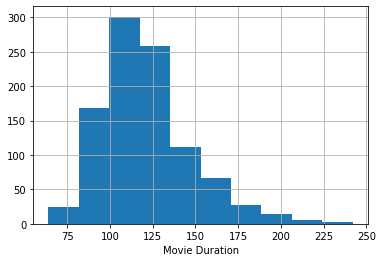

In [121]:
# Answer:

movies['duration'].hist(bins=10);
plt.xlabel('Movie Duration');

#### Use a box plot to display that same data.

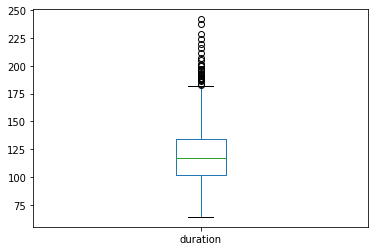

In [25]:
# Answer:

movies['duration'].plot.box();

## Intermediate level

#### Count how many movies have each of the content ratings.

In [122]:
# Answer:

movies['content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

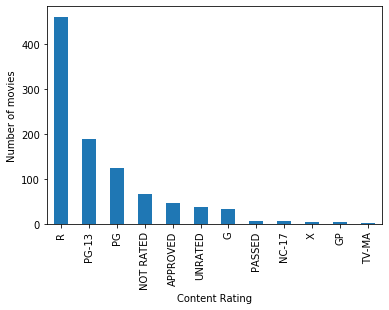

In [123]:
# Answer:

movies['content_rating'].value_counts().plot(kind='bar');
plt.xlabel('Content Rating');
plt.ylabel('Number of movies');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [124]:
movies['content_rating'].replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED', inplace = True)
movies['content_rating']

0            R
1            R
2            R
3        PG-13
4            R
5      UNRATED
6      UNRATED
7        PG-13
8            R
9            R
10       PG-13
11       PG-13
12          PG
13       PG-13
14       PG-13
15       PG-13
16           R
17     UNRATED
18           R
19          PG
20           R
21           R
22     UNRATED
23           R
24           R
25       PG-13
26       PG-13
27           R
28           R
29     UNRATED
        ...   
949         PG
950          R
951          R
952          R
953         PG
954      PG-13
955          R
956         PG
957          R
958      PG-13
959          R
960      PG-13
961          R
962         PG
963          R
964      PG-13
965      PG-13
966      PG-13
967          R
968          R
969          R
970          R
971          R
972      NC-17
973      PG-13
974         PG
975         PG
976      PG-13
977         PG
978          R
Name: content_rating, Length: 979, dtype: object

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [125]:
# Answer:

movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17', inplace = True)

#### Count the number of missing values in each column.

In [126]:
# Answer:

movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [127]:
# Answer:
null_series = pd.isnull(movies['content_rating'])
movies[null_series]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [128]:
movies['content_rating'].fillna(value='UNRATED', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [129]:
# Movies shorther than two hours:
movies[movies['duration'] < 120]['star_rating'].mean()

7.838666666666657

In [130]:
# Movies longer than two hours:
movies[movies['duration'] > 120]['star_rating'].mean()

7.953669724770622

#### Use a visualization to detect whether there is a relationship between duration and star rating.

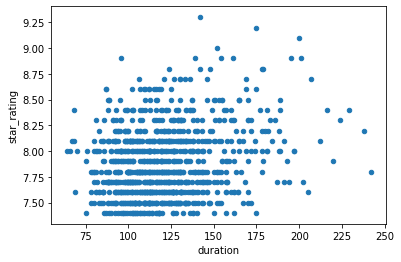

In [131]:
# Answer:

movies.plot(kind='scatter', x='duration', y='star_rating');

#### Calculate the average duration for each genre.

In [139]:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

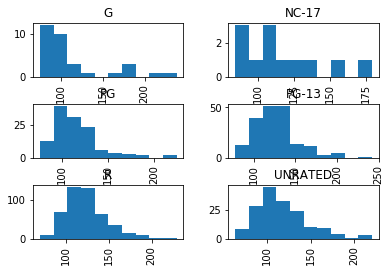

In [133]:
# Answer:

movies.hist(column='duration', by='content_rating');

#### Determine the top rated movie (by star rating) for each genre.

In [203]:
# Answer:

#PENDING

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [163]:
movies.duplicated(['title']).sum()

4

In [167]:
# Answer:
movies[movies['title'].duplicated()]

,star_rating,title,content_rating,genre,duration,actors_list
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [230]:
# Answer:

#PENDING

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [219]:
# Answer:

#PENDING

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [229]:
# Answer:

#PENDING

#### Option 4: aggregate by count and mean, then filter using the count

In [235]:
# Answer:

movies.groupby('genre').star_rating.agg(['count', 'mean'])


,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Family,2,7.850000
Fantasy,1,7.700000


## Bonus

#### Figure out something "interesting" using the actors data!